In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [ ]:
!pip install nltk
!pip install wordcloud

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer    # lemmatize
from wordcloud import WordCloud, STOPWORDS
import string
import json

In [ ]:
from sklearn.model_selection import train_test_split
random_state=42
import os
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences


2024-04-08 16:42:24.061905: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 16:42:24.758688: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

# stopwords_manual = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
STOP_WORDS = stopwords.words('english')
# STOP_WORDS = STOP_WORDS + stopwords_manual

stopwords = set(STOP_WORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.remove("not")
stopwords.remove("no")
stopwords.add(" ")
# len(stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Dataset
## AG News + BBC News

AG News

In [ ]:
ag_data_train = pd.read_csv('./train.csv')
ag_data=ag_data_train.copy()
ag_data['Summary']=ag_data['Title'] + ' ' + ag_data['Description']
ag_data.drop(columns=['Title', 'Description'],inplace=True)
News_cat={1:'politics', 2:'sport', 3:'business', 4:'tech'}
ag_data['Class Index'] = ag_data['Class Index'].apply(lambda x : News_cat[x])
ag_data.rename(columns={'Class Index':'Labels'},inplace=True)

print(ag_data.shape)
ag_data.head()

(120000, 2)


,Labels,Summary
0,business,Wall St. Bears Claw Back Into the Black (Reute...
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...
4,business,"Oil prices soar to all-time record, posing new..."


BBC News

In [ ]:
bbc_data=pd.read_csv('./BBC News Train.csv')
bbc_data=bbc_data[bbc_data['Category']!='entertainment']
bbc_data.drop(columns=['ArticleId'],inplace=True)
bbc_data.rename(columns={'Text':'Summary', 'Category' : 'Labels'}, inplace=True)
print(bbc_data.shape)

bbc_data.head(3)

(1217, 2)


,Summary,Labels
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business


In [ ]:
bbc_test=pd.read_csv('./bbc_test.csv')
bbc_test['Summary']=bbc_test['Headline'] + ' ' + bbc_test['Description']
bbc_test.drop(columns=['Headline', 'Description'],inplace=True)
bbc_test

,Labels,Summary
0,sport,- qpr keeper day heads for preston queens park...
1,tech,- software watching while you work software th...
2,business,- d arcy injury adds to ireland woe gordon d a...
3,politics,- boro suffer morrison injury blow middlesbrou...
4,sport,- lewsey puzzle over disallowed try england s ...
...,...,...
583,politics,- dogged federer claims dubai crown world numb...
584,sport,- eu to probe alitalia state aid the europea...
585,tech,- u2 to play at grammy awards show irish rock ...
586,business,- sport betting rules in spotlight a group of ...


In [ ]:
bbc=pd.concat([bbc_data,bbc_test], axis=0)
bbc

,Summary,Labels
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
...,...,...
583,- dogged federer claims dubai crown world numb...,politics
584,- eu to probe alitalia state aid the europea...,sport
585,- u2 to play at grammy awards show irish rock ...,tech
586,- sport betting rules in spotlight a group of ...,business


whole dataset

In [ ]:

data=pd.concat([bbc,ag_data],axis =0)
data.to_csv('data_news.csv',index = 'False')
print(data.shape)
data.head()

(121805, 2)


,Summary,Labels
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


#Analyze whole dataset

In [ ]:
df = data.copy()
# df= ag_data.copy()
print('total shape',df.shape)
print('total columns',df.columns)
print('*'*50)
print(df.info())

total shape (121805, 2)
total columns Index(['Summary', 'Labels'], dtype='object')
**************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 121805 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Summary  121805 non-null  object
 1   Labels   121805 non-null  object
dtypes: object(2)
memory usage: 2.8+ MB
None


#*Exploratory* Data Analysis

###Plotting Word clouds

- Politics

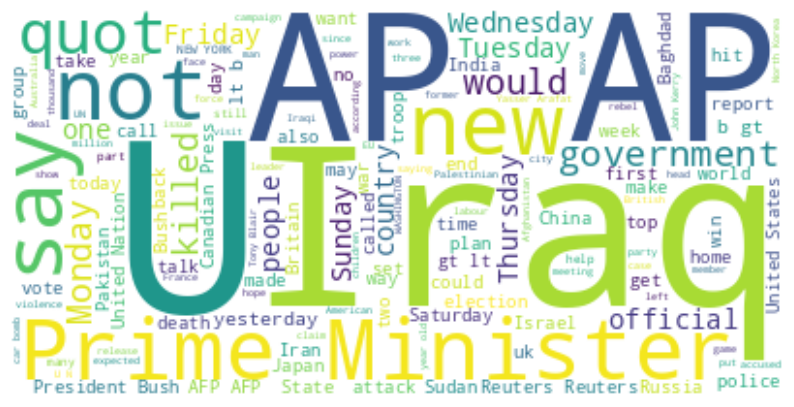

In [ ]:
politics = df.Summary[df['Labels'][df['Labels']=='politics'].index]

plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(politics))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Sport

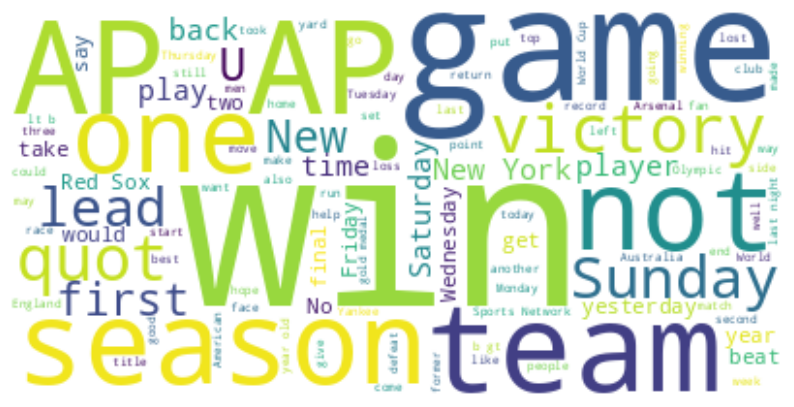

In [ ]:
sport = df.Summary[df['Labels'][df['Labels']=='sport'].index]

plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(sport))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Business

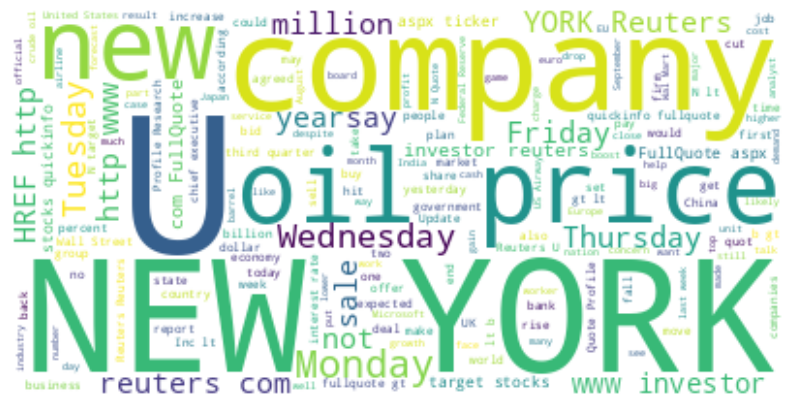

In [ ]:
buisness = df.Summary[df['Labels'][df['Labels']=='business'].index]

plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(buisness))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Tech

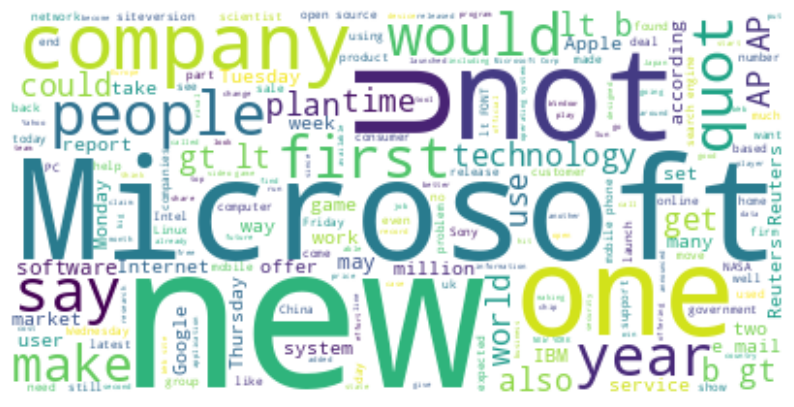

In [ ]:
tech = df.Summary[df['Labels'][df['Labels']=='tech'].index]

plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(tech))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Text Preprocessing

###Preprocessing:
- Removing html tags
- Removing Punctuations
- Performing stemming
- Removing Stopwords
- Expanding contractions etc.


In [ ]:
###-------------------------------- preprocessing text ------------------------------###

# Expanding Constractions

def text_preprocess(x):
    x = str(x).lower()
    x = x.replace('%',' percent').replace('₹',' rupee').replace('$',' dollar').replace('€',' euro')\
                                .replace(',000,000','m').replace('000','k').replace('′',"'").replace("’","'")\
                                .replace("won't","will not").replace("can't",'can not').replace("shouldn't","should not")\
                                .replace("what's",'"what is"').replace("that's",'that is').replace("he's","he is")\
                                .replace("she's","she is").replace("it's","it is").replace("'ve"," have").replace("'re"," are")\
                                .replace("'ll"," will").replace("i'm","i am").replace("n't", " not")
    x = re.sub(r'([0-9]+)000000',r'\1m',x)
    x = re.sub(r'([0-9]+)000',r'\1k',x)

    return x

def extract_features(df):
    df['Summary'] = df['Summary'].fillna("").apply(text_preprocess)

    return df

# Removal of URLs

def remove_urls(text):

    url_pattern = re.compile(r'https?://\S+|www\.\S+')

    return url_pattern.sub(r'', text)

# Removal of HTML tags

def remove_html(text):

    html_pattern = re.compile('<.*?>')

    return html_pattern.sub(r'', text)

# Spiliting words

def word_tokenize(txt):

    tokens = re.findall("[\w']+", txt)

    return tokens

# Removal Stopwords

def remove_stopwords(lst):

    stop=stopwords
    new_lst=[]
    for i in lst:

        if i not in stop:
            new_lst.append(i)

    return new_lst

def remove_extrawords(lst):

    stop=['href','lt','gt','ii','iii','ie','quot','com','u','n']   ## This all words are most repeated words as we observed in WordCloud and it does not make any sense
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)

    return new_lst

# Removal of punctuations

def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in  string.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst

# Removal of Numbers

def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  string.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst

# Lemmatzation of Data

lemmatizer = WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst

#

In [ ]:
def preprocess(df):

  # data
  if 'Summary' not in list(df.columns):
    df['Summary'] = df['Headline'] + ' ' + df['Description']
    df.drop(columns=['Headline', 'Description'],inplace=True)
    df.rename(columns={'Class Index':'Labels'},inplace=True)

  # Extract Features
  df = extract_features(df)

  # URLs
  df.Summary=df.Summary.apply(remove_urls)

  # HTML tags
  df.Summary=df.Summary.apply(remove_html)

  # Split word
  df.Summary=df.Summary.apply(word_tokenize)

  # Stopwords & Extrawords
  df.Summary=df.Summary.apply(remove_stopwords)
  df.Summary=df.Summary.apply(remove_extrawords)

  # Punctuation symbols
  df.Summary=df.Summary.apply(remove_punctuations)

  # Numbers
  df.Summary=df.Summary.apply(remove_numbers)

  # Lemmatzation
  df.Summary=df.Summary.apply(lemmatzation)

  # label
  cat={'politics':0, 'sport':1, 'business':2, 'tech':3}
  df['Labels'] = df['Labels'].apply(lambda x : cat[x])

  # split into X, y
  X_df=df['Summary']
  y_df=df['Labels']

  print("token features...")


  return df,X_df,y_df


In [ ]:
df2=df.copy()

In [ ]:
df2,X_df,y_df=preprocess(df2)
df2.head()

token features...


,Summary,Labels
0,"[worldcom, ex, bos, launch, defence, lawyer, d...",2
1,"[german, business, confidence, slide, german, ...",2
2,"[bbc, poll, indicates, economic, gloom, citize...",2
3,"[lifestyle, governs, mobile, choice, faster, b...",3
4,"[enron, boss, dollarm, payout, eighteen, forme...",2


## Setting up hyperparameters


In [ ]:
# the maximum number of words to keep, based on word frequency
NUM_WORDS = 20000

# dimension of the dense embedding that will be used in the embedding layer of the model
EMBEDDING_DIM = 16

# maximum length of all sequences
MAXLEN = 40

# padding strategy
PADDING = 'post'

# token to replace out-of-vocabulary words during text_to_sequence() calls
OOV_TOKEN = "<OOV>"


# split data to train and test


In [ ]:
X_train, X_val, y_train , y_val  = train_test_split(X_df,y_df,test_size=0.15,random_state=random_state)
(X_train.shape,y_train.shape),(X_val.shape,y_val.shape)

(((103534,), (103534,)), ((18271,), (18271,)))

#Tokenization: Sequences and Padding

tokenizing trainig set

In [ ]:
#----------------------X-----------------------
#tokenizing

def fit_tokenizer(data_sentences, num_words, oov_token):
    # instantiate the Tokenizer class
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)

    # fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(data_sentences)

    return tokenizer

# sequence & padding

def seq_and_pad(sentences, tokenizer, padding, maxlen):
    # convert training sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)

    # pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences,
                                     maxlen=maxlen,
                                     padding=padding,
                                     truncating='post')

    return padded_sequences



In [ ]:
# fit the Tokenizer
tokenizer = fit_tokenizer(X_train, NUM_WORDS, OOV_TOKEN)

# Save
tt=tokenizer.to_json()
save_file = open("tokenizer_model.json", "w")
json.dump(tt, save_file)
save_file.close()

# get word_index
word_index = tokenizer.word_index

print(f"Number of words in the vocabulary: {len(word_index)}\n")

X_tr_padded_seq = seq_and_pad(X_train, tokenizer, PADDING, MAXLEN)
X_val_padded_seq = seq_and_pad(X_val, tokenizer, PADDING, MAXLEN)

y_tr_label_seq = y_train
y_val_label_seq = y_val

print(f"Shape of padded training sequences: {X_tr_padded_seq.shape}\n")
print(f"Shape of padded validation sequences: {X_val_padded_seq.shape}\n")

print(f"Shape of tokenized labels of the training set: {y_tr_label_seq.shape}\n")
print(f"Shape of tokenized labels of the validation set: {y_val_label_seq.shape}\n")
print(f"First 5 labels of the training set:\n{y_tr_label_seq[:5]}\n")

Number of words in the vocabulary: 56718

Shape of padded training sequences: (103534, 40)

Shape of padded validation sequences: (18271, 40)

Shape of tokenized labels of the training set: (103534,)

Shape of tokenized labels of the validation set: (18271,)

First 5 labels of the training set:
94656    3
9612     2
89003    0
425      3
64729    0
Name: Labels, dtype: int64



In [ ]:
X_train=X_tr_padded_seq
y_train=y_tr_label_seq

X_val=X_val_padded_seq
y_val=y_val_label_seq


## Text classification model

In [ ]:
def model(num_words, embedding_dim, maxlen, lstm1_dim, lstm2_dim, num_categories):
    tf.random.set_seed(42)
    regularizer = tf.keras.regularizers.l2(1)


    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim,kernel_regularizer=regularizer, dropout=0.4, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim,kernel_regularizer=regularizer, dropout=0.4)),
        tf.keras.layers.Dense(num_categories, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [ ]:
num_unique_categories = np.unique(y_train)
print(f'Number of unique categories in the training dataset: {len(num_unique_categories)}')

Number of unique categories in the training dataset: 4


In [ ]:
# set LSTM dimensions
lstm1_dim = 32
lstm2_dim = 16

# create the model
model = model(NUM_WORDS, EMBEDDING_DIM, MAXLEN, lstm1_dim, lstm2_dim, len(num_unique_categories))

print(f'\nModel Summary: {model.summary()}')

2024-04-08 16:44:21.310605: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10211 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:09:00.0, compute capability: 8.6


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 16)            320000    
                                                                 
 bidirectional (Bidirection  (None, 40, 64)            12544     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                10368     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 4)                 132       
                                                                 
Total params: 343044 (1.31 MB)
Trainable params: 343044 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Model Summary: None

train model

In [ ]:
callback= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)

history = model.fit(X_train, y_train,batch_size=64,
                    epochs=20, validation_data=(X_val, y_val),
                    shuffle=True, callbacks=[callback])

Epoch 1/20


2024-04-08 16:44:29.093598: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-04-08 16:44:29.238500: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-04-08 16:44:29.239706: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f93cc02b9c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-08 16:44:29.239724: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-04-08 16:44:29.244361: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-08 16:44:29.306391: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-08 16:44:29.36831

1618/1618 [==============================] - 56s 31ms/step - loss: 7.9182 - accuracy: 0.6949 - val_loss: 0.5877 - val_accuracy: 0.8070
Epoch 2/20
1618/1618 [==============================] - 26s 16ms/step - loss: 0.5298 - accuracy: 0.8391 - val_loss: 0.4468 - val_accuracy: 0.8681
Epoch 3/20
1618/1618 [==============================] - 23s 14ms/step - loss: 0.4510 - accuracy: 0.8705 - val_loss: 0.4234 - val_accuracy: 0.8743
Epoch 4/20
1618/1618 [==============================] - 23s 14ms/step - loss: 0.3682 - accuracy: 0.8940 - val_loss: 0.3688 - val_accuracy: 0.8919
Epoch 5/20
1618/1618 [==============================] - 23s 14ms/step - loss: 0.3337 - accuracy: 0.9060 - val_loss: 0.3863 - val_accuracy: 0.8881
Epoch 6/20
1618/1618 [==============================] - 23s 14ms/step - loss: 0.3174 - accuracy: 0.9103 - val_loss: 0.3414 - val_accuracy: 0.9001
Epoch 7/20
1618/1618 [==============================] - 23s 14ms/step - loss: 0.3038 - accuracy: 0.9149 - val_loss: 0.3869 - val_accura

Evaluating Model Training

In [ ]:
def evaluate_model(history):
    # Check how accracy and loss changes over the training epochs

    epoch_accuracy = history.history['accuracy']
    epoch_val_accuracy = history.history['val_accuracy']
    epoch_loss = history.history['loss']
    epoch_val_loss = history.history['val_loss']

    plt.figure(figsize=(20, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, 'b-', linewidth=2, label='Training Accuracy')
    plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, 'r-', linewidth=2, label='Validation Accuracy')
    plt.title('Training & validation accuracy over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(range(0, len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Training Loss')
    plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Validation Loss')
    plt.title('Training & validation loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')

    plt.show()

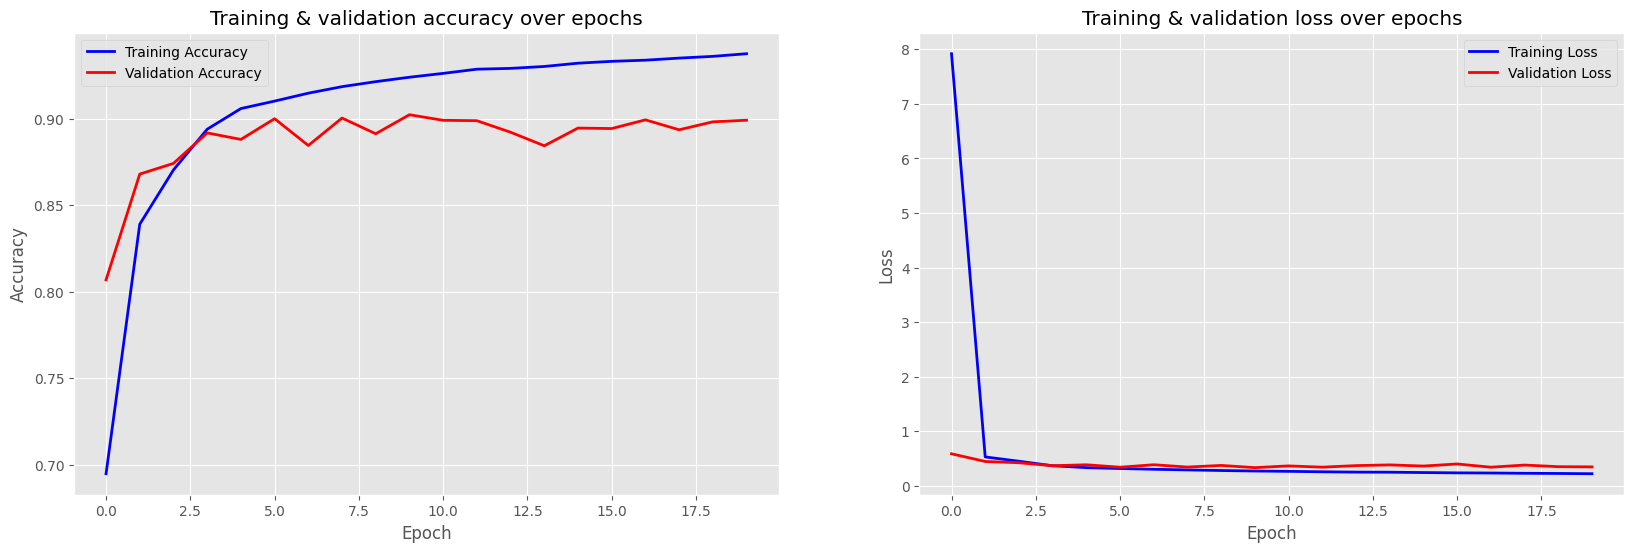

In [ ]:
# check how accuract & loss changes over epochs during the training process
evaluate_model(history)


In [ ]:
# save model
model.save('my_model.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

3236/3236 [==============================] - 19s 6ms/step - loss: 0.2217 - accuracy: 0.9450
Train Loss: 0.2217, Train Accuracy: 0.9450


## Prediction


In [ ]:
test=pd.read_csv('./test.csv')
test_df,X_test_df,y_test_df=preprocess(test)
test_df.head()


token features...


,Labels,Summary
0,2,"[fear, pension, talk, union, representing, wor..."
1,3,"[race, second, private, team, set, launch, dat..."
2,3,"[ky, company, win, grant, study, peptide, ap, ..."
3,3,"[prediction, unit, help, forecast, wildfire, a..."
4,3,"[calif, aim, limit, farm, related, smog, ap, a..."


In [ ]:
# fit the Tokenizer for the test dataset

# Load training tokenizer
with open('tokenizer_model.json') as f:
   tt = json.load(f)

# tokenizer = tokenizer_from_json('saved_tokenizer.json')
tokenizer = tokenizer_from_json(tt)

# get word_index
test_word_index = tokenizer.word_index

X_test = seq_and_pad(X_test_df, tokenizer, PADDING, MAXLEN)
y_test=y_test_df

print(f"Number of words in the test vocabulary: {len(test_word_index)}\n")
print(f"Shape of padded testing sequences: {X_test.shape}\n")

Number of words in the test vocabulary: 56718

Shape of padded testing sequences: (7600, 40)



In [ ]:
# make predictions (categories) on the test data
y_pred = model.predict(X_test)

238/238 [==============================] - 2s 5ms/step


In [ ]:
# Get the class with the highest probability for each input sentence
predicted_classes = y_pred.argmax(axis=1)
print(f'Predicted classes:\n\n {predicted_classes}')

Predicted classes:

 [2 3 3 ... 1 2 2]


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

238/238 [==============================] - 1s 6ms/step - loss: 0.3309 - accuracy: 0.9025
Test Loss: 0.3309, Test Accuracy: 0.9025


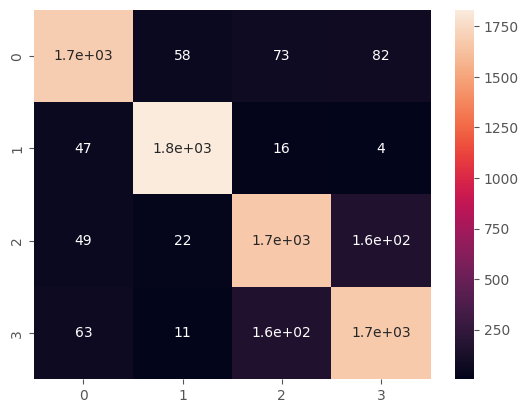

In [ ]:
cm = confusion_matrix(y_test.values, predicted_classes)
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [ ]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1900
           1       0.95      0.96      0.96      1900
           2       0.87      0.88      0.88      1900
           3       0.87      0.88      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600

